In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


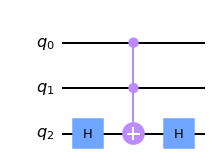

In [2]:
backend=Aer.get_backend('statevector_simulator')
oracle = QuantumCircuit(3,name='oracle')
oracle.h(2)
oracle.ccx(0,1,2)
oracle.h(2)

oracle.draw()

In [3]:
grover=QuantumCircuit(3,3) #Creamos un circuito de 3 qubits
grover.h(range(3)) #INICIALIZACIÓN DE ESTADOS: Puertas hadamard en los tres qubits

job = execute(grover,backend) #Ejecutamos el circuito y guardamos el resultado de la ejecución
result= job.result()
sv = result.get_statevector() #Obtenemos el vector de estados
np.around(sv,2) #Redondeamos

array([0.35+0.j, 0.35+0.j, 0.35+0.j, 0.35+0.j, 0.35+0.j, 0.35+0.j,
       0.35+0.j, 0.35+0.j])

In [4]:
grover.append(oracle,range(3))
job = execute(grover,backend)
result= job.result()
sv = result.get_statevector()
np.around(sv,2)

array([ 0.35+0.j,  0.35+0.j,  0.35+0.j,  0.35-0.j,  0.35+0.j,  0.35+0.j,
        0.35+0.j, -0.35+0.j])

OPERADOR DE GROVER SEGÚN NIELSENG & CHUANG

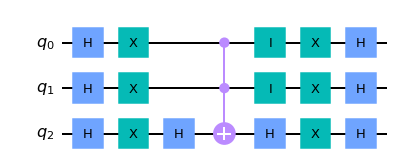

In [5]:
diffusion=QuantumCircuit(3,name='diffusion')
diffusion.h(range(3))    #Puertas hadamard en los dos qubits (desde el qubit 0 hasta el 2)
diffusion.x(range(3))    #Puertas X en los dos qubits (desde el qubit 0 hasta el 2)
diffusion.h(2)           #Puerta hadamard en el qubit 2
diffusion.mct([0,1],2,0) #Puerta CNOT con control en los qubits 0 y 1 y objetivo en el qubit 2
diffusion.i([0,1])       #Puerta identidad simplemente para mostrar las siguientes puertas
                         #X y hadamard a la misma altura
diffusion.h(2)
diffusion.x(range(3))
diffusion.h(range(3))
diffusion.draw()         #Dibujamos el circuito

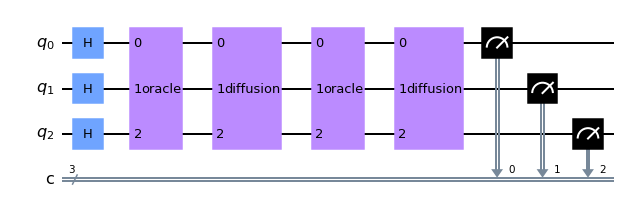

In [6]:
grover=QuantumCircuit(3,3) #Creamos un circuito de 3 qubits
grover.h(range(3)) #INICIALIZACIÓN DE ESTADOS: Puertas hadamard en los tres qubits


for i in range(2): #Dos iteraciones, añadimos dos veces el oráculo y 
                   #la transformación de difusión
    grover.append(oracle,range(3))
    grover.append(diffusion,range(3))
grover.measure(range(3),range(3))
grover.draw()

In [7]:
job = execute(grover,backend,shots=1000)#Ejecutamos el algoritmo 1000 veces
result = job.result()
sv = result.get_statevector() #Obtenemos el vector de estados
np.around(sv,2)

array([0.+0.j, 0.+0.j, 0.+0.j, 0.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

In [8]:
counts=result.get_counts()
counts

{'101': 5,
 '010': 6,
 '011': 11,
 '000': 8,
 '111': 940,
 '001': 9,
 '110': 11,
 '100': 10}

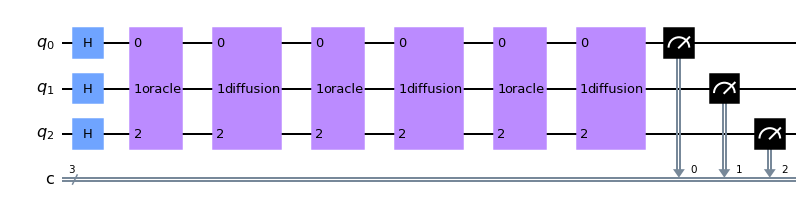

In [9]:
grover2=QuantumCircuit(3,3) #Creamos un circuito de 3 qubits
grover2.h(range(3)) #INICIALIZACIÓN DE ESTADOS: Puertas hadamard en los tres qubits
for i in range(3): #Dos iteraciones
    grover2.append(oracle,range(3))
    grover2.append(diffusion,range(3))
grover2.measure(range(3),range(3))
grover2.draw()

In [10]:
job2 = execute(grover2,backend,shots=1000)#Ejecutamos el algoritmo 1000 veces
result2 = job2.result()
sv2 = result2.get_statevector() #Obtenemos el vector de estados
np.around(sv2,2)

array([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [11]:
counts2=result2.get_counts()
counts2

{'010': 93,
 '101': 97,
 '001': 105,
 '000': 92,
 '111': 312,
 '011': 108,
 '110': 93,
 '100': 100}

PERIODO = 9 hagamos 9 iteraciones (+ las 2 necesarias,luego 11)

In [12]:
grover2=QuantumCircuit(3,3) #Creamos un circuito de 3 qubits
grover2.h(range(3)) #INICIALIZACIÓN DE ESTADOS: Puertas hadamard en los tres qubits
for i in range(11): #Dos iteraciones
    grover2.append(oracle,range(3))
    grover2.append(diffusion,range(3))
grover2.measure(range(3),range(3))
job2 = execute(grover2,backend,shots=1000)#Ejecutamos el algoritmo 1000 veces
result2 = job2.result()
sv2 = result2.get_statevector() #Obtenemos el vector de estados

counts2=result2.get_counts()
counts2

{'101': 21,
 '100': 30,
 '110': 29,
 '010': 38,
 '011': 25,
 '111': 807,
 '000': 28,
 '001': 22}